# Übung 2
# Arbeit mit Netzwerk-Datensätzen & Starke und Schwache Verbindungen

Laden Sie sich den Datensatz zur Studie der Freundschaftsbeziehungen innerhalb eines Karate-Clubs von Wayne Zachary von diesem [Link](http://moreno.ss.uci.edu/data.html#zachary) herunter. 

Richten Sie sich eine Java-Entwicklungsumgebung mit folgenden Alternativen ein:

1. Nutzen Sie die unter diesem [Link](https://github.com/schemm/sna) bereitgestellte Entwicklungsumgebung in Form eines [*Jupyter*](https://jupyter.org/) Notebooks. 
2. Nutzen Sie eine lokale Entwicklungsumgebung Ihrer Wahl. 

In beiden Fällen binden Sie bitte die folgenden Bibliotheken ein:
* [*JGraphT*](https://jgrapht.org)
* [*XChart*](https://knowm.org/open-source/xchart/)

Installieren Sie sich den Grapheneditor [*yEd*](https://www.yworks.com/products/yed).

Bearbeiten Sie die folgenden Aufgaben in Java unter Nutzung der eingebundenen Bibliotheken. Hilfestellungen bieten die Online-Dokumentationen der Bibliotheken sowie folgendes Beispiel:  [HelloWorld](https://github.com/schemm/sna/blob/master/HelloWorld.ipynb).

## Lade Bibliotheken

### JGraphT

In [11]:
%%loadFromPOM
<dependency>
    <groupId>org.jgrapht</groupId>
    <artifactId>jgrapht-core</artifactId>
    <version>1.3.1</version>
</dependency>
<dependency>
    <groupId>org.jgrapht</groupId>
    <artifactId>jgrapht-io</artifactId>
    <version>1.3.1</version>
</dependency>

### XChart

In [12]:
%%loadFromPOM
<dependency>
    <groupId>org.knowm.xchart</groupId>
    <artifactId>xchart</artifactId>
    <version>3.6.0</version>
</dependency>

## Aufgabe 1

Importieren Sie den Datensatz als Graph und geben Sie den Graphen anschließend über die Standardausgabe via *System.out.println()* aus. Verwenden Sie die gewichtete Variante des Datensatzes. 


> *Tipps*
> 
> Verwenden Sie die folgenden Klassen bzw. Methoden:
> * CSVImporter
> * CSVImporter.importGraph(Graph\<V,E> graph, Reader input)
> * CSVImporter.setDelimiter(char delimiter)
> * CSVImporter.setFormat(CSVFormat format)
> * CSVImporter.setParameter(CSVFormat.Parameter p, boolean value)
> * FileReader
> 
> Dokumentationen zu diesen finden Sie in den [Javadocs zu JGraphT](https://jgrapht.org/javadoc/). 	
> Verwenden Sie für den Import die beiden unten implementierten Objekte der Klassen *VertexProvider* und *EdgeProvider*.

In [13]:
import org.jgrapht.*;
import org.jgrapht.graph.*;
import org.jgrapht.io.*;

VertexProvider<String> vertexProvider = new VertexProvider<String>() {
    @Override
    public String buildVertex(String id, Map<String, Attribute> attributes) {
        return id;
    }
};

EdgeProvider<String, DefaultWeightedEdge> edgeProvider = new EdgeProvider<String, DefaultWeightedEdge>() {
    @Override
    public DefaultWeightedEdge buildEdge(String from, String to, String label, Map<String, Attribute> attributes) {
        return new DefaultWeightedEdge();
    }
};

In [14]:
import org.jgrapht.*;
import org.jgrapht.graph.*;
import org.jgrapht.io.*;

SimpleWeightedGraph<String, DefaultWeightedEdge> g = new SimpleWeightedGraph<>(DefaultWeightedEdge.class);

CSVImporter<String, DefaultWeightedEdge> importer = new CSVImporter<>(vertexProvider, edgeProvider);
importer.setFormat(CSVFormat.MATRIX);
importer.setParameter(CSVFormat.Parameter.EDGE_WEIGHTS, true);
importer.setParameter(CSVFormat.Parameter.MATRIX_FORMAT_ZERO_WHEN_NO_EDGE, true);
importer.setDelimiter(' ');

try {

    FileReader fr = new FileReader("zachary_weighted.csv");
    importer.importGraph(g, fr);

    System.out.println(g.toString());

} catch (Exception e) {
    e.printStackTrace();
}

([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34], [{1,2}, {1,3}, {1,4}, {1,5}, {1,6}, {1,7}, {1,8}, {1,9}, {1,11}, {1,12}, {1,13}, {1,14}, {1,18}, {1,20}, {1,22}, {1,32}, {2,3}, {2,4}, {2,8}, {2,14}, {2,18}, {2,20}, {2,22}, {2,31}, {3,4}, {3,8}, {3,9}, {3,10}, {3,14}, {3,28}, {3,29}, {3,33}, {4,8}, {4,13}, {4,14}, {5,7}, {5,11}, {6,7}, {6,11}, {6,17}, {7,17}, {9,31}, {9,33}, {9,34}, {10,34}, {14,34}, {15,33}, {15,34}, {16,33}, {16,34}, {19,33}, {19,34}, {20,34}, {21,33}, {21,34}, {23,33}, {23,34}, {24,26}, {24,28}, {24,30}, {24,33}, {24,34}, {25,26}, {25,28}, {25,32}, {26,32}, {27,30}, {27,34}, {28,34}, {29,32}, {29,34}, {30,33}, {30,34}, {31,33}, {31,34}, {32,33}, {32,34}, {33,34}])


## Aufgabe 2

Geben Sie für jede Person im Netzwerk den Grad aus. 

> *Tipps*
> 
> Verwenden Sie eine geeignete Methode der Klasse *Graph*. Dokumentationen zu dieser finden Sie in den [Javadocs zu JGraphT](https://jgrapht.org/javadoc/). 

In [15]:
Set<String> nodes = g.vertexSet();
for(String node : nodes) {
    System.out.println(node + " : " + g.degreeOf(node));		
}

1 : 16
2 : 9
3 : 10
4 : 6
5 : 3
6 : 4
7 : 4
8 : 4
9 : 5
10 : 2
11 : 3
12 : 1
13 : 2
14 : 5
15 : 2
16 : 2
17 : 2
18 : 2
19 : 2
20 : 3
21 : 2
22 : 2
23 : 2
24 : 5
25 : 3
26 : 3
27 : 2
28 : 4
29 : 3
30 : 4
31 : 4
32 : 6
33 : 12
34 : 17


## Aufgabe 3

Berechnen Sie den Grad des Netzwerks und geben sie diesen aus. 

In [16]:
double average_degree = 0;

for(String node : nodes) {
    average_degree += g.degreeOf(node);
}

average_degree = average_degree / nodes.size();

System.out.println(average_degree);

4.588235294117647


## Aufgabe 4

Stellen Sie die Grad-Verteilung des Netzwerks in Form eines Diagramms dar. 

> *Tipps*
> 
> Verwenden Sie *XChart* analog dem Beispiel [HelloWorld](https://github.com/schemm/sna/blob/master/HelloWorld.ipynb) zur 
> graphischen Darstellung der Verteilung. Weitere Code-Beispiele zur Verwendung von *XChart* finden Sie bspw. [hier](https://knowm.org/open-source/xchart/xchart-example-code/). 	

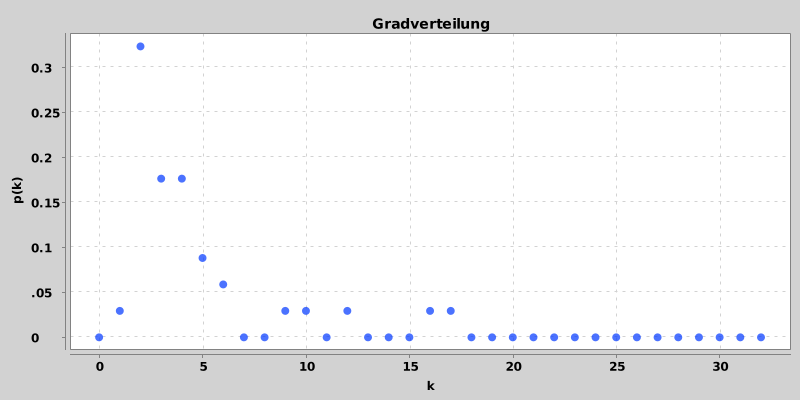

In [17]:
import org.knowm.xchart.*;
import org.knowm.xchart.style.markers.SeriesMarkers;
import org.knowm.xchart.style.lines.SeriesLines;

double[] xData = new double[nodes.size()-1];
double[] yData = new double[nodes.size()-1];

for(int i=0; i<=nodes.size()-2; i++) {
    xData[i] = i;
    yData[i] = 0;
}

for(String node : nodes) {
    yData[g.degreeOf(node)]++;
}

for(int i=0; i<=nodes.size()-2; i++) {
    yData[i] = yData[i]/nodes.size();
}

XYChart chart = new XYChart(800,400);
chart.setTitle("Gradverteilung");
chart.setXAxisTitle("k");
chart.setYAxisTitle("p(k)");
XYSeries series = chart.addSeries("p(k)", xData, yData);
series.setMarker(SeriesMarkers.CIRCLE);
series.setLineStyle(SeriesLines.NONE);

BitmapEncoder.getBufferedImage(chart);

## Aufgabe 5

Exportieren Sie den Graphen in das Dateiformat *GML*. Visualisierung Sie den Graph anschliessend mit dem Grapheneditor [*yEd*](https://www.yworks.com/products/yed).

> *Tipps*
> 
> Nutzen Sie zum Export die Klasse *GmlExporter*. Setzen Sie mit der Methode
> *GmlExporter.setParameter(GmlExporter.Parameter p, boolean value)* geeignete
> Parameter, um bspw. die Knotenbezeichnungen und Kantengewichte mit zu exportieren.
> 
> Experimentieren Sie mit verschiedenen Layouts um eine übersichtliche Darstellung
> des Netzwerks zu erhalten. 

In [18]:
GmlExporter exporter = new GmlExporter();
    exporter.setParameter(GmlExporter.Parameter.EXPORT_EDGE_WEIGHTS, true);
    exporter.setParameter(GmlExporter.Parameter.EXPORT_VERTEX_LABELS, true);

try {
    exporter.exportGraph(g, new FileWriter("graph.gml"));
    
} catch (Exception e) {
    e.printStackTrace();
}

## Aufgabe 6

Betrachten Sie Ihre Darstellung des Netzwerks und beantworten Sie die folgenden Fragen:

1. Was ist die *embededdness* der Kante E-F? 
2. Was ist der *neighborhood overlap* der Kante E-F?
3. Was ist die *embededdness* der Kante E-G?
4. Was ist der *neighborhood overlap* der Kante E-G?

1.: 2
2.: 0,5
3.: 0
4.: 0

## Aufgabe 7

Berechnen Sie den *neighbourhood overlap* für alle Kanten des Netzwerks. Stellen Sie anschliessend die Beziehung zwischen Gewicht und *neighbourhood overlap* graphisch dar. 

> *Tipps*
> 
> Verwenden Sie geeignete Methoden der Klasse *Graph*. Dokumentationen zu dieser
> finden Sie in den [Javadocs zu JGraphT](https://jgrapht.org/javadoc/). 	
> 
> Zur Ermittlung der Mengen an Nachbarn der Kantenendpunkte eignen sich bspw. die
> folgenden Klassen und Methoden: 
> * HashSet
> * HashSet.addAll(Collection c)
> * HashSet.retainAll(Collection c)
> 
> Verwenden Sie *XChart* analog dem Beispiel [HelloWorld](https://github.com/schemm/sna/blob/master/HelloWorld.ipynb) zur 
> graphischen Darstellung der Verteilung. Weitere Code-Beispiele zur Verwendung von *XChart* finden Sie bspw. [hier](https://knowm.org/open-source/xchart/xchart-example-code/). 

(1 : 2) : 4.0
(1 : 3) : 5.0
(1 : 4) : 3.0
(1 : 5) : 3.0
(1 : 6) : 3.0
(1 : 7) : 3.0
(1 : 8) : 2.0
(1 : 9) : 2.0
(1 : 11) : 2.0
(1 : 12) : 3.0
(1 : 13) : 1.0
(1 : 14) : 3.0
(1 : 18) : 2.0
(1 : 20) : 2.0
(1 : 22) : 2.0
(1 : 32) : 2.0
(2 : 3) : 6.0
(2 : 4) : 3.0
(2 : 8) : 4.0
(2 : 14) : 5.0
(2 : 18) : 1.0
(2 : 20) : 2.0
(2 : 22) : 2.0
(2 : 31) : 2.0
(3 : 4) : 3.0
(3 : 8) : 4.0
(3 : 9) : 5.0
(3 : 10) : 1.0
(3 : 14) : 3.0
(3 : 28) : 2.0
(3 : 29) : 2.0
(3 : 33) : 2.0
(4 : 8) : 3.0
(4 : 13) : 3.0
(4 : 14) : 3.0
(5 : 7) : 2.0
(5 : 11) : 3.0
(6 : 7) : 5.0
(6 : 11) : 3.0
(6 : 17) : 3.0
(7 : 17) : 3.0
(9 : 31) : 3.0
(9 : 33) : 3.0
(9 : 34) : 4.0
(10 : 34) : 2.0
(14 : 34) : 3.0
(15 : 33) : 3.0
(15 : 34) : 2.0
(16 : 33) : 3.0
(16 : 34) : 4.0
(19 : 33) : 1.0
(19 : 34) : 2.0
(20 : 34) : 1.0
(21 : 33) : 3.0
(21 : 34) : 1.0
(23 : 33) : 2.0
(23 : 34) : 3.0
(24 : 26) : 5.0
(24 : 28) : 4.0
(24 : 30) : 3.0
(24 : 33) : 5.0
(24 : 34) : 4.0
(25 : 26) : 2.0
(25 : 28) : 3.0
(25 : 32) : 2.0
(26 : 32) : 7.0
(27 :

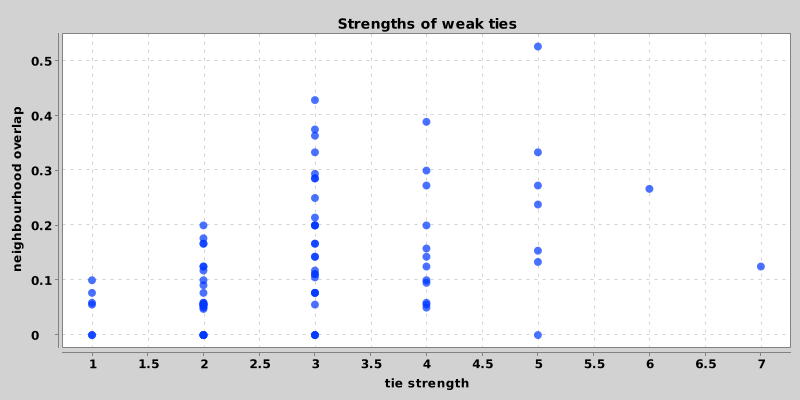

In [19]:
Set<DefaultWeightedEdge> edges = g.edgeSet();
for(DefaultWeightedEdge edge: edges) {
    System.out.println(edge.toString() + " : " + g.getEdgeWeight(edge));
}

HashMap<DefaultWeightedEdge, Double> NeighbourhoodOverlap = new HashMap<DefaultWeightedEdge, Double>();

for(DefaultWeightedEdge edge: edges) {
    String a = g.getEdgeSource(edge);
    String b = g.getEdgeTarget(edge);

    Set<String> neighbours_of_a = Graphs.neighborSetOf(g, a);
    Set<String> neighbours_of_b = Graphs.neighborSetOf(g, b);

    Set<String> neighbours_of_a_and_b = new HashSet<>();
    neighbours_of_a_and_b.addAll(neighbours_of_a);
    neighbours_of_a_and_b.retainAll(neighbours_of_b);
    double numerator = neighbours_of_a_and_b.size();

    Set<String> neighbours_of_a_or_b = new HashSet<>();
    neighbours_of_a_or_b.addAll(neighbours_of_a);
    neighbours_of_a_or_b.addAll(neighbours_of_b);
    neighbours_of_a_or_b.remove(a);
    neighbours_of_a_or_b.remove(b);
    double denominator = neighbours_of_a_or_b.size();
    
    NeighbourhoodOverlap.put(edge, Double.valueOf(numerator/denominator));
}

System.out.println(NeighbourhoodOverlap.toString());

double[] tieStrength = new double[edges.size()];
double[] neighbourhoodOverlap = new double[edges.size()];

int j=0;
for(DefaultWeightedEdge edge : edges) {
    tieStrength[j] = g.getEdgeWeight(edge);
    neighbourhoodOverlap[j] = NeighbourhoodOverlap.get(edge).doubleValue();
    j++;
}

chart = new XYChart(800,400);
chart.setTitle("Strengths of weak ties");
chart.setXAxisTitle("tie strength");
chart.setYAxisTitle("neighbourhood overlap");
series = chart.addSeries("neighbourhood overlap", tieStrength, neighbourhoodOverlap);
series.setMarker(SeriesMarkers.CIRCLE);
series.setLineStyle(SeriesLines.NONE);

BitmapEncoder.getBufferedImage(chart);